## 1. 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행 (SVM, LR, RF, DT, KNN)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./diabetes.csv", index_col=None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
# 컬렴명 확인
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

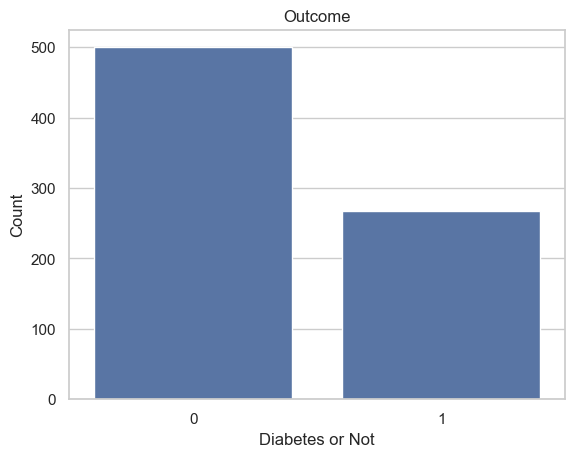

In [48]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [49]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [50]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

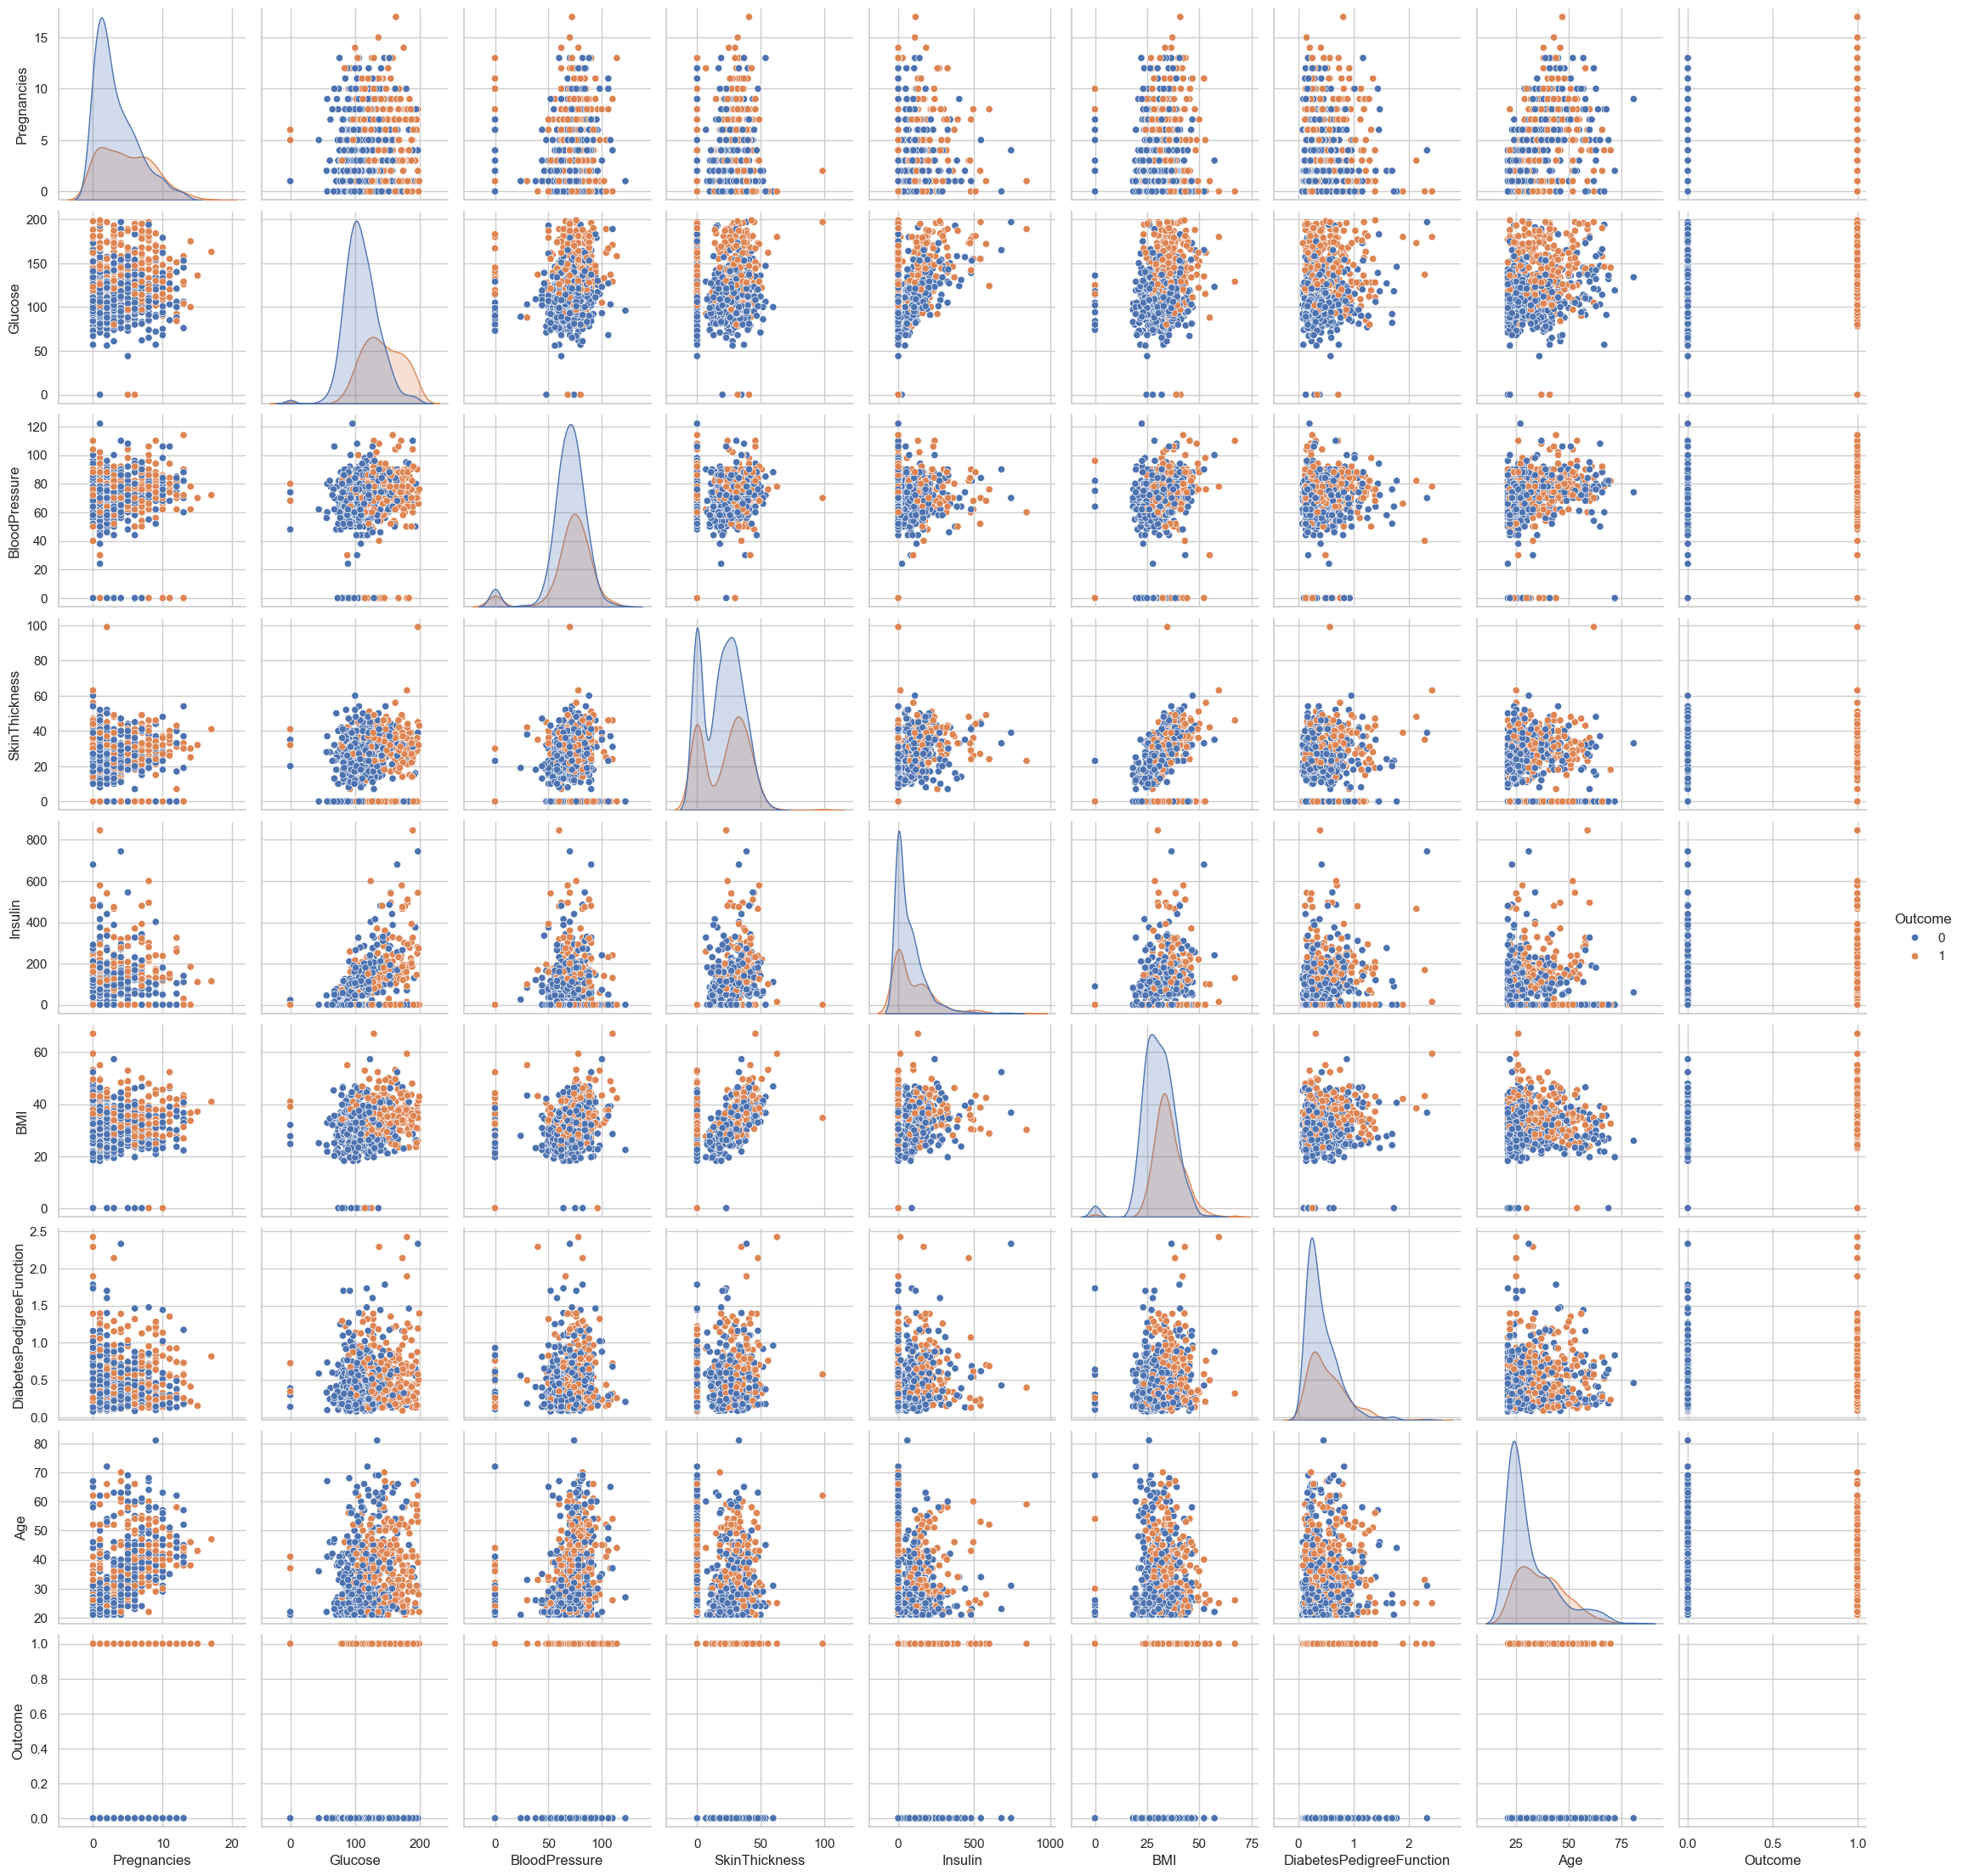

In [51]:
# pairplot을 그릴 때 변수 리스트를 사용
sns.pairplot(df, vars=df.columns, hue='Outcome')
plt.show()

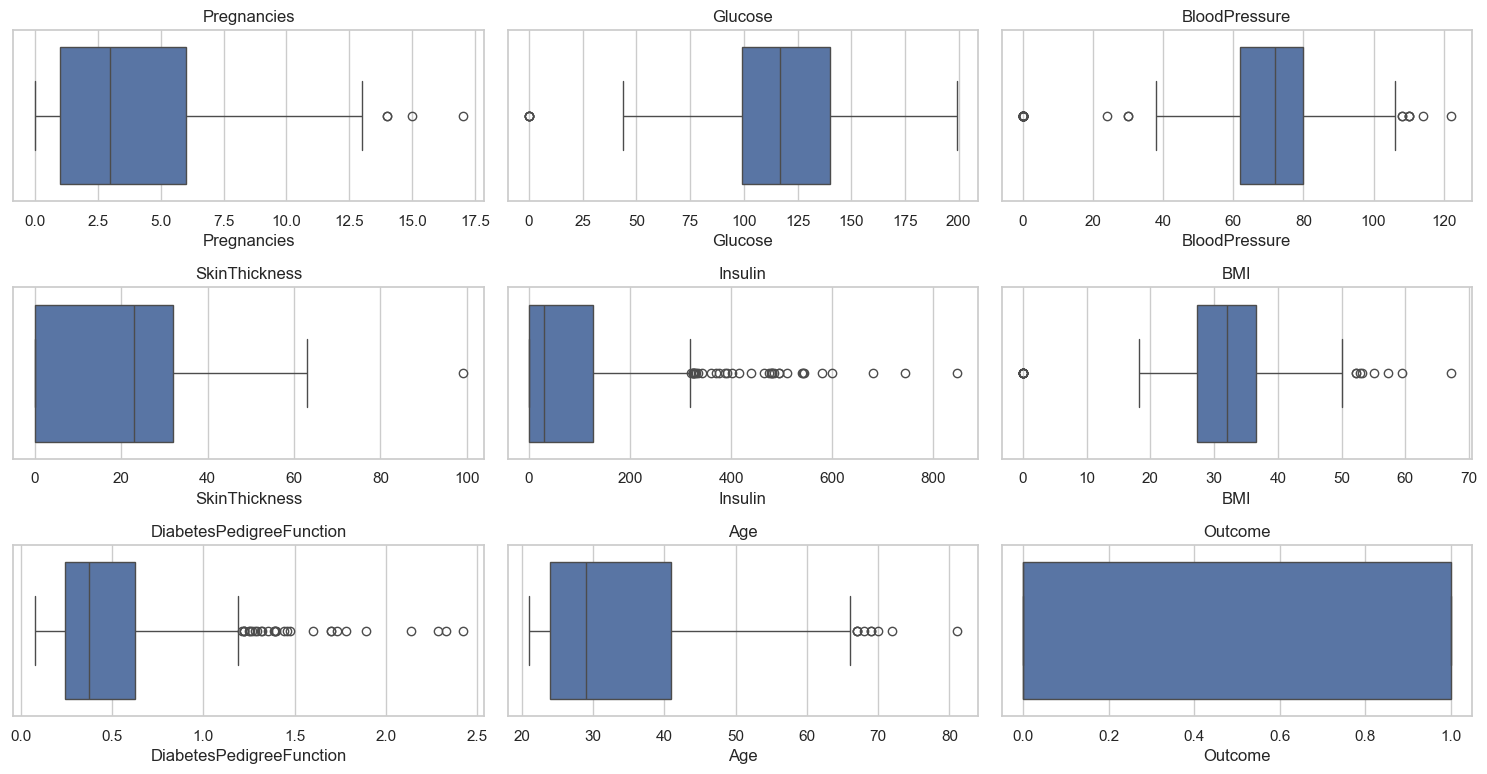

In [52]:
# 데이터프레임의 수치형 칼럼들을 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯을 각 수치형 칼럼에 대해 반복적으로 그리기
plt.figure(figsize=(15, 10))  # 적절한 사이즈로 설정
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(x=column, data=df)
    plt.title(column)

plt.tight_layout()  # 레이아웃 조정
plt.show()

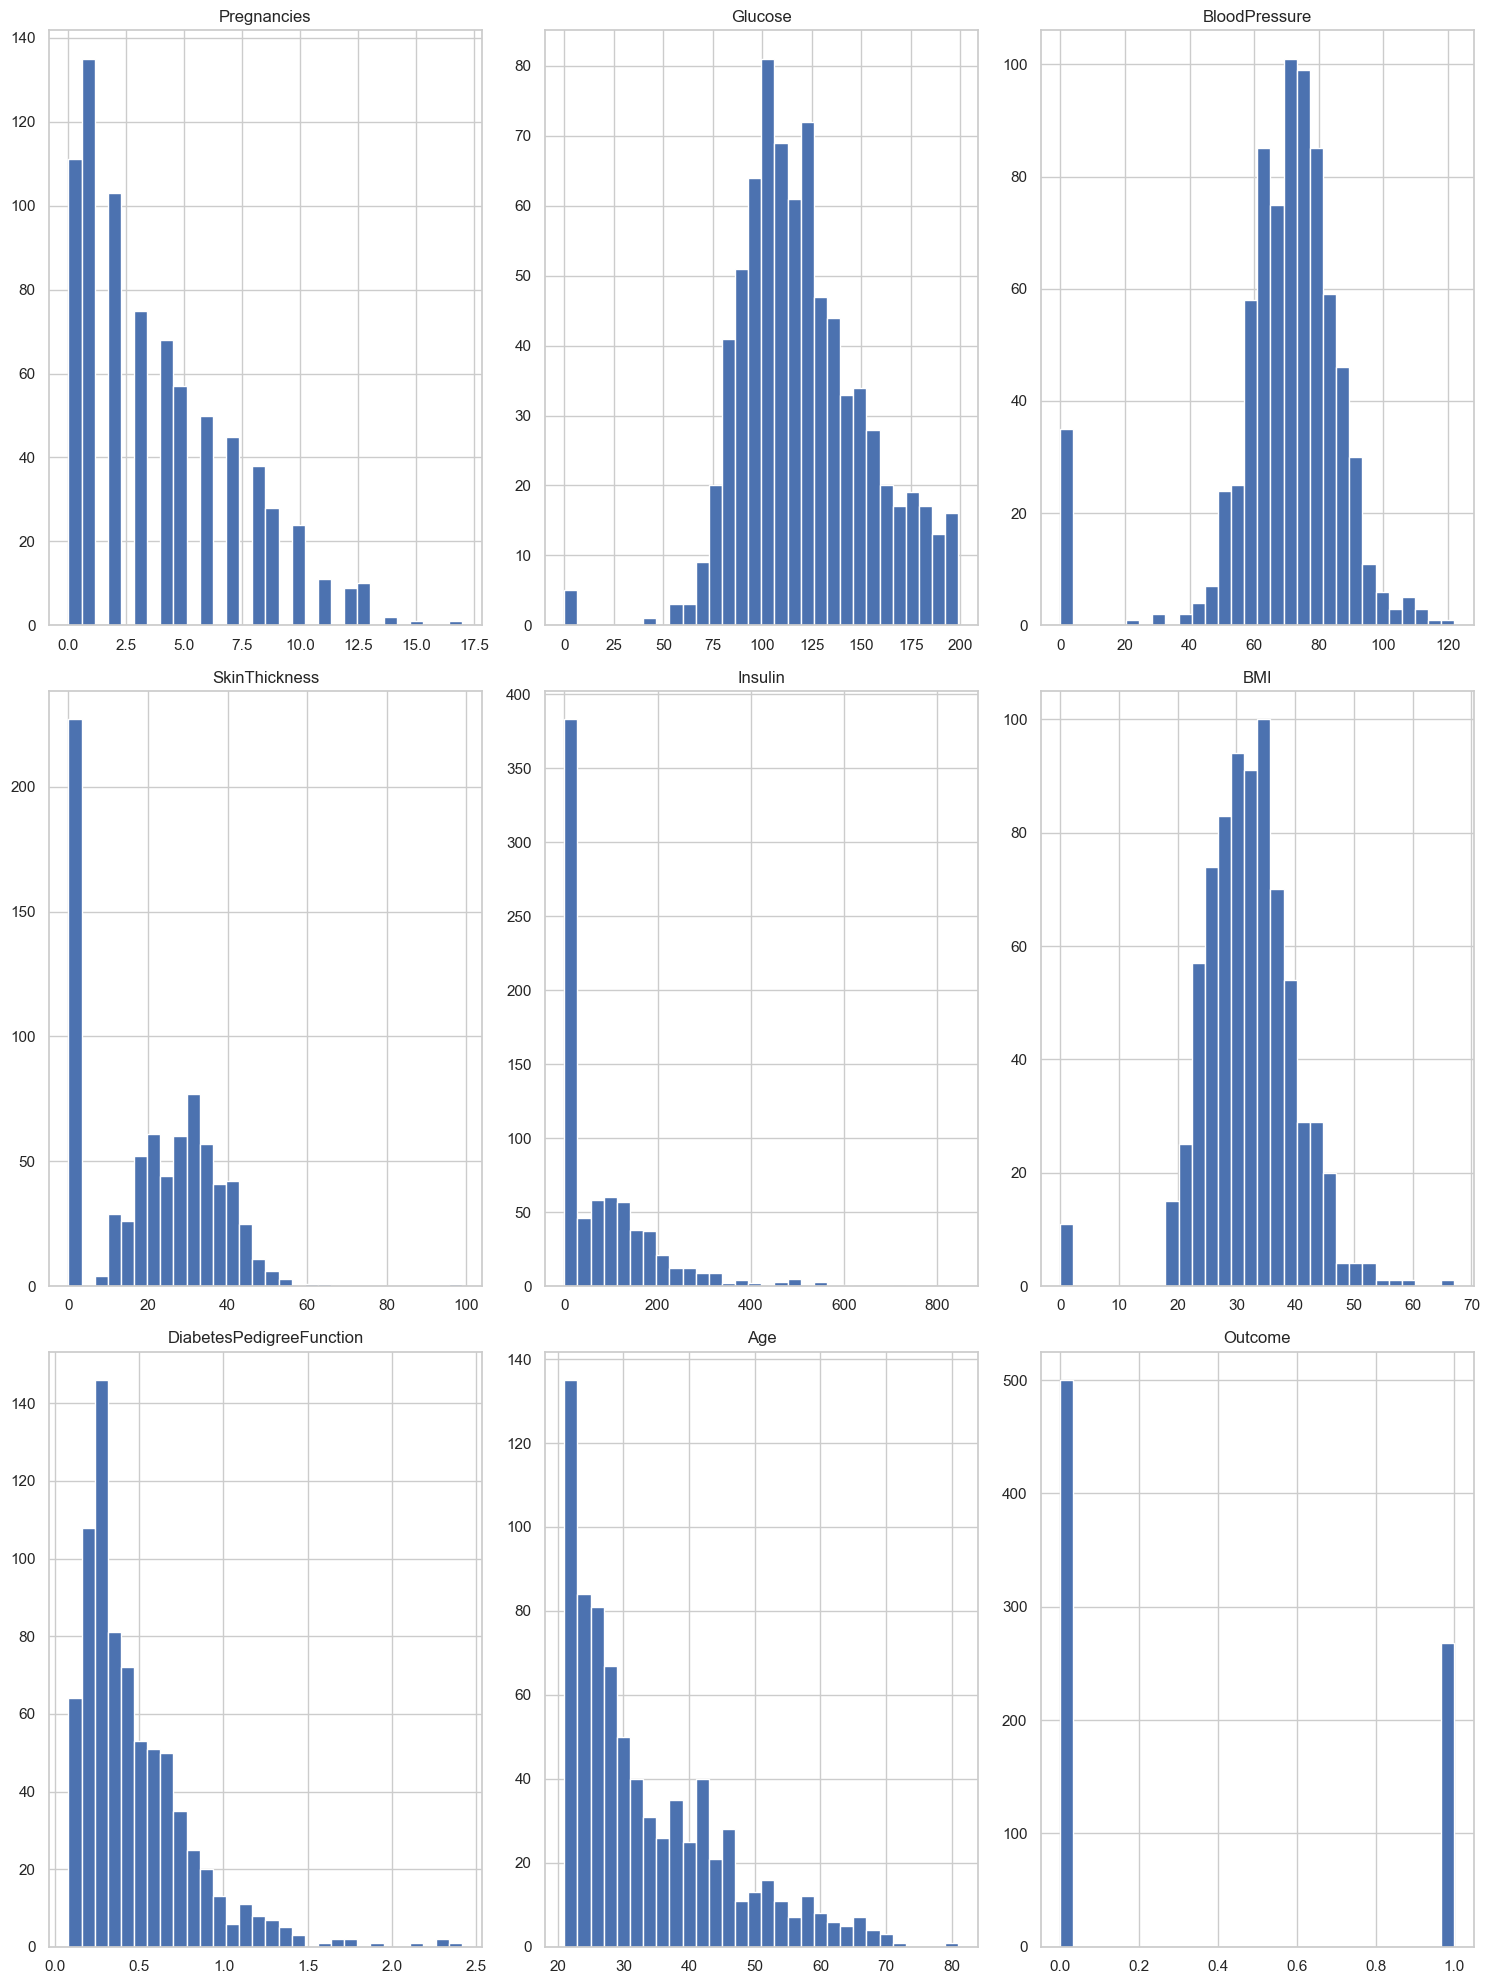

In [53]:
# 각 컬럼별 히스토그램을 그리는 코드
df.hist(figsize=(15, 20), bins=30)  # ax 인수 없이 자동으로 서브플롯 생성
plt.tight_layout()  # 서브플롯 간격을 자동으로 조정
plt.show()

In [54]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [55]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [56]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [59]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7708333333333334
[[119  11]
 [ 33  29]]


In [60]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0, max_iter=200)
# 수렴하지 않을 경우, 기본값 iter(=100)을 늘려주면 된다.
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.796875
[[117  13]
 [ 26  36]]


In [61]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.7239583333333334
[[103  27]
 [ 26  36]]


In [62]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.71875
[[102  28]
 [ 26  36]]


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7708333333333334
[[116  14]
 [ 30  32]]


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 모델 리스트 생성
model = []

# 모델을 5번 생성 및 학습
for i in range(5):
    model.append(KNeighborsClassifier(n_neighbors=6))
    model[i].fit(X_train, y_train)  # X_train과 y_train에서 인덱스를 빼야 함

# 예측값 저장 및 평가
knn_preds = []
for i in range(5):
    knn_preds.append(model[i].predict(X_test))  # X_test도 인덱스 없이 사용
    print(f"Model {i+1}:")
    print("Accuracy:", accuracy_score(y_test, knn_preds[i]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds[i]))
    print("\n")

Model 1:
Accuracy: 0.7604166666666666
Confusion Matrix:
 [[114  16]
 [ 30  32]]


Model 2:
Accuracy: 0.7604166666666666
Confusion Matrix:
 [[114  16]
 [ 30  32]]

Model 3:
Accuracy: 0.7604166666666666
Confusion Matrix:
 [[114  16]
 [ 30  32]]


Model 4:
Accuracy: 0.7604166666666666
Confusion Matrix:
 [[114  16]
 [ 30  32]]


Model 5:
Accuracy: 0.7604166666666666
Confusion Matrix:
 [[114  16]
 [ 30  32]]


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 모델 리스트 생성
model = []

# 모델을 5번 생성 및 학습
for i in range(1,6):
    model.append(KNeighborsClassifier(n_neighbors=i))
    model[i-1].fit(X_train, y_train)  # X_train과 y_train에서 인덱스를 빼야 함

# 예측값 저장 및 평가
knn_preds = []
for i in range(1,6):
    knn_preds.append(model[i-1].predict(X_test))  # X_test도 인덱스 없이 사용
    print(f"Model {i}:")
    print("Accuracy:", accuracy_score(y_test, knn_preds[i-1]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds[i-1]))
    print("\n")

Model 1:
Accuracy: 0.6197916666666666
Confusion Matrix:
 [[93 37]
 [36 26]]


Model 2:
Accuracy: 0.71875
Confusion Matrix:
 [[117  13]
 [ 41  21]]


Model 3:
Accuracy: 0.6979166666666666
Confusion Matrix:
 [[100  30]
 [ 28  34]]


Model 4:
Accuracy: 0.765625
Confusion Matrix:
 [[117  13]
 [ 32  30]]


Model 5:
Accuracy: 0.7552083333333334
Confusion Matrix:
 [[109  21]
 [ 26  36]]

